# 텍스트 데이터 전처리
- 텍스트 데이터 전처리는 자연어 처리에서 매우 중요한 단계
- 원시 데이터를 모델에 적합한 형태로 변환하는 과정
- 토큰화, 불용어 제거, 형태소 분석 등의 전처리 기법 포함

## 토큰화(Tokenization)
- 텍스트를 작은 단위(토큰)로 나누는 과정
- 일반적으로 단어, 구, 문장 등을 기준으로 사용

 ### 단어 토큰화
  - 문장을 단어 단위로 나누는 방법
  - "자연어 처리는 재미있다"  
    -> ["자연어", "처리", "는", "재미있다"]

 ### 문장 토큰화
  - 문단을 문장 단위로 나누는 방법
  - "자연어 처리는 재미있다. 파이썬은 강력하다"  
    -> ["자연어 처리는 재미있다", "파이썬은 강력하다"]

 ### 관련 라이브러리
  - NLTK,spaCy, KoNLPy 등

## 불용어 제거(Stopwords Removal)
  - 텍스트에서 분석에 불필요한 자주 등장하지만 의미가 거의 없는 단어를 제거하는 과정
  - 한국어의 "는", "이", "가", "에" 등,
  - 영어는 "is", "the", "at" 등

  #### 방법
    - 사전 정의된 불용어 리스트를 사용하여 제거
    - NLTK와 같은 라이브러리에서 제공하는 기본 불용어 리스트를 활용
    - 도메인에 맞게 직접 커스터마이징하여 사용

## 형태소 분석(Morphological)
- 단어를 형태소라는 최소 의미 단위로 분해하고 품사 태깅을 통해 각 형태소의 역할을 파악하는 과정

 ### 중요성
 - 한국어와 같이 교착어(어미와 조사가 붙는 언어)의 경우, 형태소 분석이 특히 중요
 ### 도구
 - koNLPy 라이브러리에서 제공하는 형태소 분석기(Okt, Kkma, Komoran 등)
 - "자연어 처리는 재미있다"   
   -> ["자연어/Noun", "처리/Noun", "는/Josa", "재미있다/Adj

### KoNLPy는 여러 형태소 분석기를 지원
- 각 분석기마다 태그셋이 조금씩 다를 수 있음
#### Okt (Open Korean Text) 주요 품사 태그
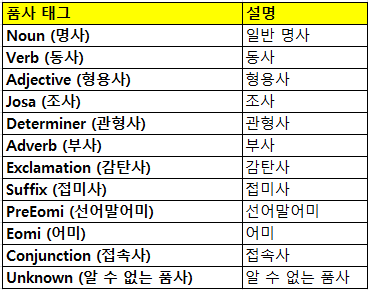

#### Komoran 주요 품사 태그
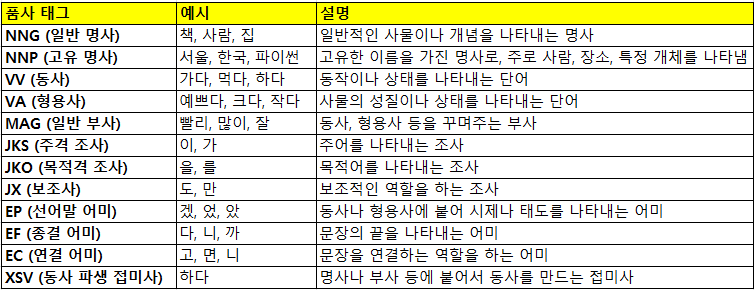

### 예시 코드

In [1]:
!pip install konlpy

### koNLPy사용을 위해 JDK(Java Development Kit) 설치 필요
- 오라클 홈페이지에 로그인하여 JDK 1.8 버전 다운로드 및 설치
    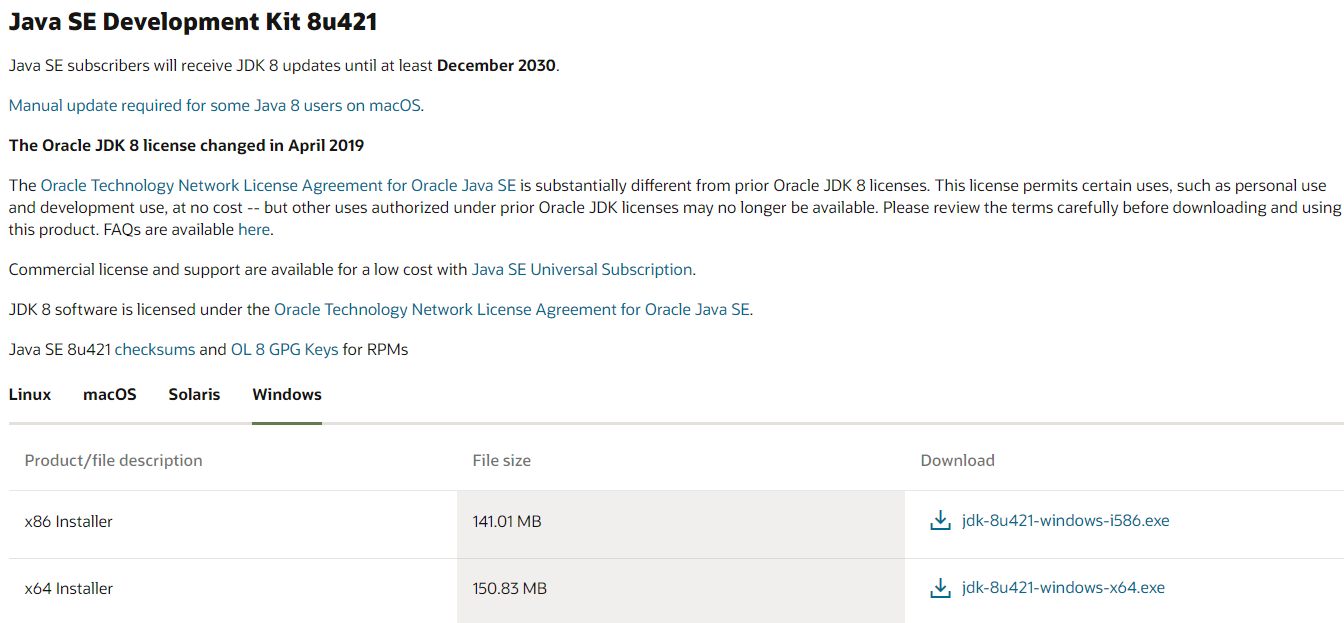

#### **Okt(Open Korean Text) 형태소 분석기 사용하기**
    이전에 "Twitter"라는 이름으로 불리던 한국어 형태소 분석기
    한국어 텍스트를 형태소 단위로 나누고, 각 형태소에 대한 품사를 태깅
    한국어 특성에 맞게 설계되어 명사, 동사, 형용사 등 다양한 품사 태그 부여 가능

In [2]:
from konlpy.tag import Okt

# 예제 텍스트
text = "자연어 처리는 재미있습니다. 파이썬을 사용하여 다양한 작업을 할 수 있습니다."

# Okt 형태소 분석기 초기화
okt = Okt()

**pos() - 품사 태깅 (Part-of-Speech Tagging)**
- 입력된 텍스트를 형태소 단위로 나누고, 각 형태소에 대해 품사(Part-of-Speech, POS)를 태깅하여 (형태소, 품사)의 튜플로 이루어진 리스트를 반환
- 텍스트의 구조를 분석하고, 각 단어의 역할(예: 명사, 동사, 형용사 등)을 파악하고자 할 때 사용

In [3]:
# 형태소 분석 및 품사 태깅 (Okt)
tokens_pos_okt = okt.pos(text)
print("Okt 형태소 분석 및 품사 태깅 결과")
print(tokens_pos_okt)

Okt 형태소 분석 및 품사 태깅 결과
[('자연어', 'Noun'), ('처리', 'Noun'), ('는', 'Josa'), ('재미있습니다', 'Adjective'), ('.', 'Punctuation'), ('파이썬', 'Noun'), ('을', 'Josa'), ('사용', 'Noun'), ('하여', 'Verb'), ('다양한', 'Adjective'), ('작업', 'Noun'), ('을', 'Josa'), ('할', 'Verb'), ('수', 'Noun'), ('있습니다', 'Adjective'), ('.', 'Punctuation')]


**nouns() - 명사 추출**
- 입력된 텍스트에서 명사(Nouns)만을 추출하여 리스트로 반환
- 주로 명사만을 대상으로 분석하거나, 텍스트에서 중요한 키워드를 추출하고자 할 때 유용

In [4]:
# 명사만 추출 (Okt)
nouns_okt = okt.nouns(text)
print("\nOkt 명사 추출 결과:")
print(nouns_okt)


Okt 명사 추출 결과:
['자연어', '처리', '파이썬', '사용', '작업', '수']


**morphs() - 형태소 추출**
- 입력된 텍스트를 형태소 단위로 분해하여, 품사 정보 없이 형태소의 리스트만을 반환
- 단어 단위로 텍스트를 분할하고 싶을 때, 품사 태깅 없이 형태소 자체를 분석하거나 처리하고자 할 때 사용

In [5]:
# 형태소 분석 (단어 단위) (Okt)
morphs_okt = okt.morphs(text)
print("\nOkt 형태소 분석 결과 (단어 단위):")
print(morphs_okt)


Okt 형태소 분석 결과 (단어 단위):
['자연어', '처리', '는', '재미있습니다', '.', '파이썬', '을', '사용', '하여', '다양한', '작업', '을', '할', '수', '있습니다', '.']


**stem=True 옵션**
- pos, morphs 함수에서 활성화하면 각 단어를 어간으로 변환하여 출력

In [6]:
# 어간 추출 (Okt)
stems_okt = okt.morphs(text, stem=True) # stem=True
print("\nOkt 어간 추출 결과:")
print(stems_okt)


Okt 어간 추출 결과:
['자연어', '처리', '는', '재미있다', '.', '파이썬', '을', '사용', '하다', '다양하다', '작업', '을', '하다', '수', '있다', '.']


#### 비교
- Okt 형태소 분석 결과 (단어 단위)  
['자연어', '처리', '는', '재미있습니다', '.', '파이썬', '을', '사용', '하여', '다양한', '작업', '을', '할', '수', '있습니다', '.'
- Okt 어간 추출 결과  
['자연어', '처리', '는', '재미있다', '.', '파이썬', '을', '사용', '하다', '다양하다', '작업', '을', '하다', '수', '있다', '.']]

#### **Komoran 형태소 분석기 사용**

In [7]:
from konlpy.tag import Komoran

# Komoran 형태소 분석기 초기화
komoran = Komoran()

In [8]:
# 형태소 분석 및 품사 태깅 (Komoran)
tokens_pos_komoran = komoran.pos(text)
print("\nKomoran 형태소 분석 및 품사 태깅 결과:")
print(tokens_pos_komoran)


Komoran 형태소 분석 및 품사 태깅 결과:
[('자연어', 'NNP'), ('처리', 'NNG'), ('는', 'JX'), ('재미있', 'VA'), ('습니다', 'EF'), ('.', 'SF'), ('파이썬', 'NNP'), ('을', 'JKO'), ('사용', 'NNG'), ('하', 'XSV'), ('아', 'EC'), ('다양', 'XR'), ('하', 'XSA'), ('ㄴ', 'ETM'), ('작업', 'NNG'), ('을', 'JKO'), ('하', 'VV'), ('ㄹ', 'ETM'), ('수', 'NNB'), ('있', 'VX'), ('습니다', 'EF'), ('.', 'SF')]


In [9]:
# 명사만 추출 (Komoran)
nouns_komoran = komoran.nouns(text)
print("\nKomoran 명사 추출 결과:")
print(nouns_komoran)


Komoran 명사 추출 결과:
['자연어', '처리', '파이썬', '사용', '작업', '수']


In [10]:
# 형태소 분석 (단어 단위) (Komoran)
morphs_komoran = komoran.morphs(text)
print("\nKomoran 형태소 분석 결과 (단어 단위):")
print(morphs_komoran)


Komoran 형태소 분석 결과 (단어 단위):
['자연어', '처리', '는', '재미있', '습니다', '.', '파이썬', '을', '사용', '하', '아', '다양', '하', 'ㄴ', '작업', '을', '하', 'ㄹ', '수', '있', '습니다', '.']


In [11]:
# 어간 추출 (Komoran은 어간 추출 기능을 별도로 제공하지 않으므로, 품사 태깅 결과로 대체)
stems_komoran = [word for word, pos in tokens_pos_komoran if pos.startswith('VV') or pos.startswith('VA')] # VV:동사, VA:형용사
print("\nKomoran 어간 추출 결과:")
print(stems_komoran)


Komoran 어간 추출 결과:
['재미있', '하']


## 텍스트 정규화
- 텍스트 데이터의 일관성을 높이기 위한 과정
- 소문자화, 특수문자 제거, 어간 추출 및 표제어 추출을 포함

  ### 소문자화 및 특수문자 제거
  - 텍스트 내의 모든 대문자를 소문자로 변환하는 과정
  - 대소문자 구분을 안하는 언어 모델 사용 시 일관성 유지를 도움
  - Porter Stemmer, Snowball Stemmer 등 사용

  ### 어간 추출 및 표제어 추출
  - 단어의 어간(Stem) 부분만 남기고 나머지 부분을 제거하는 방법
  - "running", "ran", "runs", "run"
  

## 텍스트 정규화 주요 과정

### 소문자 변환 (Lowercasing)
    텍스트의 모든 문자를 소문자로 변환하여 대소문자 구분 없이 일관성 있게 처리
    예: "Hello World" → "hello world"

### 불필요한 문자 제거 (Removing Punctuation)
    텍스트에서 불필요한 구두점(쉼표, 마침표 등)을 제거
    예: "Hello, World!" → "Hello World"

### 공백 정리 (Whitespace Normalization)
    텍스트 내의 불필요한 공백을 제거하거나 하나로 통일
    예: "Hello World" → "Hello World"

### 숫자 변환 (Converting Numbers)
    숫자를 일관된 형식으로 변환하거나, 필요에 따라 단어로 변환
    예: "I have 2 apples" → "I have two apples" 또는 "I have [NUM] apples"

### 어근 추출 (Stemming) 및 표제어 추출 (Lemmatization)
    어근 추출(Stemming)은 단어의 접미사를 제거하여 어근을 찾는 과정
    표제어 추출(Lemmatization)은 단어의 기본형(표제어)을 찾아 변환하는 과정
    예: "running", "ran" → "run" (Lemmatization)

### 특수 문자 및 기호 제거 (Removing Special Characters)
    텍스트에서 특정 특수 문자나 기호를 제거
    예: "Hello #World!" → "Hello World"

### 단어 축약 풀기 (Expanding Contractions)
    축약된 단어를 원래 형태로 확장
    예: "can't" → "cannot"

### 맞춤법 및 문법 교정 (Spelling and Grammar Correction)
    텍스트의 맞춤법 오류를 교정
    예: "I hav a apple" → "I have an apple"

### 정규 표현식 활용 (Using Regular Expressions)
    정규 표현식을 사용하여 패턴을 찾아내고 필요한 변환을 수행
    예: 이메일 주소, URL 등 특정 패턴을 찾아내어 처리

## NLTK(Natural Language Toolkit)를 사용하여 텍스트 데이터 전처리 기본 작업 해보기
    NLTK(Natural Language Toolkit)
        Python 자연어 처리 라이브러리

#### NLTK 데이터 다운로드
    punkt: 텍스트를 문장 단위와 단어 단위로 토큰화 하는데 사용되는 데이터  
    wordnet: 영어 어휘 데이터베이스(단어의 의미, 동의어, 반의어 등을 제공(어휘 정규화에 사용됨)  
    stopwords: 불용어 목록 제공

In [12]:
#!pip install nltk

In [13]:
import nltk
# NLTK 데이터 다운로드
nltk.download('punkt') # 문장 단위 분할기
nltk.download('wordnet') #온라인 어휘 참조 시스템
nltk.download('stopwords') # 불용어 목록(한글 없음)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\RURU\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\RURU\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RURU\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#### stopwords에 english파일 내용
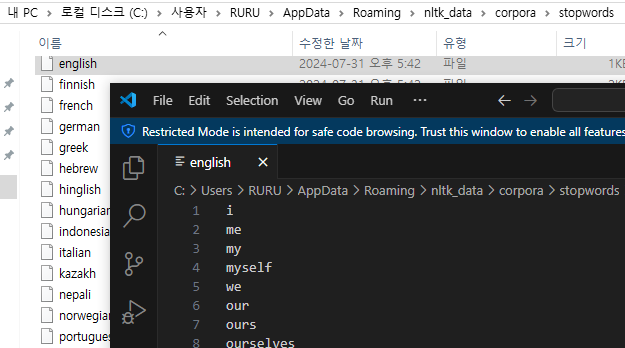

In [14]:
# 사용 준비
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import PunktSentenceTokenizer, word_tokenize

import re

In [15]:
# 초기화
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [16]:
# 소문자 변환
def to_lowercase(text):
    return text.lower()

# 불필요한 문자 제거(워드 문자(알파벳, 숫자, 밑줄)나 공백 문자가 아닌 모든 문자를 제거)
def remove_punctuation(text):
    return re.sub(r'[^\w\s]', '', text)

# 공백 정리
def normalize_whitespace(text):
    return re.sub(r'\s+', ' ', text).strip()

# 숫자 변환
def convert_numbers(text):
    return re.sub(r'\d+', 'NUM', text)

# 단어 축약 풀기
contractions = {"can't": "cannot", "won't": "will not", "I'm": "I am", "isn't": "is not", "you're": "you are", "it's": "it is"}
def expand_contractions(text):
    for key, value in contractions.items():
        text = text.replace(key, value)
    return text

# 어근 추출 및 표제어 추출 (영어만 적용)
def lemmatize_words(text):
    words = word_tokenize(text)
    return ' '.join(lemmatizer.lemmatize(word) for word in words if word not in stop_words)
    
# 특수 문자 및 기호 제거
def remove_special_characters(text):
    return re.sub(r'[^A-Za-z0-9가-힣\s]', '', text)



In [17]:
# 전체 정규화 함수 활용 예시
def normalize_text(text):
    text = to_lowercase(text) # 소문자 변환
    text = remove_punctuation(text) # 불필요한 문자 제거(워드 문자(알파벳, 숫자, 밑줄)나 공백 문자가 아닌 모든 문자를 제거)
    text = normalize_whitespace(text) # 공백 정리
    text = convert_numbers(text) # 숫자 변환
    text = expand_contractions(text) # 단어 축약 풀기
    text = lemmatize_words(text) # 어근 추출 및 표제어 추출 (영어만 적용)
    text = remove_special_characters(text) # 특수 문자 및 기호 제거
    return text

# 문장 분할과 정규화 과정
def process_text(text):
    # PunktSentenceTokenizer를 사용하여 문장 분할
    tokenizer = PunktSentenceTokenizer()
    sentences = tokenizer.tokenize(text)
    
    # 각 문장 정규화
    normalized_sentences = [normalize_text(sentence) for sentence in sentences]
    return normalized_sentences

# 영어 예제
english_text = "Hello, World! I can't believe it's already 2024. This is an example of text processing. Let's see how it works."
print("원본 영어 텍스트: ", english_text)
normalized_english = process_text(english_text)
print("정규화된 영어 텍스트: ", normalized_english)

원본 영어 텍스트:  Hello, World! I can't believe it's already 2024. This is an example of text processing. Let's see how it works.
정규화된 영어 텍스트:  ['hello world', 'cant believe already NUM', 'example text processing', 'let see work']


## 한국어 텍스트에 대한 정규화
    한국어 텍스트를 정규화할 때 고려해야 할 주요 항목
    
    - 불필요한 공백 제거
    - 특수문자 및 기호 처리
    - 대체 불가 문자 정리
    - 한글 이외의 문자 제거 또는 필터링
    - 한글 맞춤법 및 띄어쓰기 교정
    - 반복 문자 정리
    - 어미 및 조사 정규화
    - 자소 분리된 텍스트 정리
    - 동일 단어/어구 통일
    - 줄임말 및 신조어 처리
    - 형태소 분석 및 어간 추출
    - 이모티콘 및 감정 표현 처리
    - 불용어 처리

- 불필요한 공백 제거  
  문장 내에 불필요한 공백을 하나의 공백으로 줄이거나, 문장의 시작이나 끝에 있는 공백을 제거  
  예시: "안녕하세요 여러분 " → "안녕하세요 여러분"
  

In [18]:
import re

# 불필요한 공백 제거
def remove_extra_spaces(text):
    return ' '.join(text.split())

- 자소 분리된 텍스트 정리  
  텍스트에서 자소(자음, 모음) 단위로 분리된 문자를 읽기와 분석이 용이하도록 합침  
  예시: "ㅎㅏㄴㄱㅡㄹ" → "한글"

In [1]:
#!pip install hangul_utils==0.2

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for hangul_utils: filename=hangul_utils-0.2-py3-none-any.whl size=3265 sha256=b200672caeeda7688e16a49246e45d966ade899bc95f266bd505105a0758b16a
  Stored in directory: c:\users\lg\appdata\local\pip\cache\wheels\12\e5\dc\92e385dc96ad3720e5396a2b7a694f70a3630883b7b6972c05
Successfully built hangul_utils



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# 자소 분리된 텍스트 정리
# 자소 결합을 위해 필요한 라이브러리 hangul-utils
from hangul_utils import join_jamos

def correct_jaso_merge(text):
    return join_jamos(text)

- 특수문자 및 기호 처리  
  감정 분석 등의 목적으로 이모티콘이나 특정 기호가 중요한 경우를 제외하고 불필요한 특수문자, HTML 태그, 이메일 주소, URL 등을 제거  
  예시: "이거 정말 대박! #awesome 👍 http://example.com" → "이거 정말 대박"
  

In [3]:
# 특수문자 및 기호 처리
def remove_special_characters(text, keep_emojis=False):
    if keep_emojis:
        return re.sub(r'[^가-힣ㄱ-ㅎㅏ-ㅣ\s\w]', '', text)
    else:
        return re.sub(r'[^가-힣\s]', '', text)

- 대체 불가 문자 정리  
  잘못된 인코딩이나 특수한 문서 포맷으로 인해 깨진 문자(예: �)를 적절히 처리하거나 제거  
  예시: "오늘 날씨는 �" → "오늘 날씨는 "`

In [4]:
# 대체 불가 문자 정리
def remove_unknown_characters(text):
    return re.sub(r'[^\x00-\x7F가-힣ㄱ-ㅎㅏ-ㅣ\s]', '', text)

- 한글 이외의 문자 제거 또는 필터링  
  분석 목적에 따라 영어, 숫자, 기타 언어 또는 기호를 제거  
  예를 들면 한국어 텍스트만 필요할 경우 비한글 문자를 제거  
  예시: "Hello, 오늘은 2024년 8월 9일입니다." → "오늘은 년 입니다."

In [23]:
# 한글 이외의 문자 제거 (한글, 영어, 숫자, 공백은 남김)
def remove_non_korean(text):
    return re.sub(r'[^가-힣a-zA-Z0-9\s]', '', text)

- 한글 맞춤법 및 띄어쓰기 교정  
  오타나 잘못된 띄어쓰기를 교정하여 일관된 텍스트로 변환  
  별도의 맞춤법 검사기를 사용할 수 있음  
  예시: "안녕 하세요 여러분" → "안녕하세요 여러분"

In [24]:
# 한글 맞춤법 및 띄어쓰기 교정
# 맞춤법 교정을 위한 라이브러리가 필요(hanspell 패키지 사용)
from hanspell import spell_checker

def correct_spelling(text):
    try:
        result = spell_checker.check(text)
        return result.checked
    except KeyError:
        # 만약 KeyError가 발생하면 원본 텍스트를 반환
        return text

- 반복 문자 정리  
  비정상적으로 반복되는 문자를 정리  
  한국어에서는 강조를 위해 문자나 음절을 반복하는 경우가 있는데, 이를 적절히 처리  
  예시: "우와아아아아" → "우와"

In [25]:
# 반복 문자 정리
def normalize_repeated_characters(text):
    return re.sub(r'(.)\1+', r'\1', text)

- 어미 및 조사 정규화  
  텍스트 내의 다양한 어미와 조사를 일관되게 변환하여 분석의 일관성을 높임  
  예시: "가고 싶어", "가고 싶다" → "가고 싶다"

In [26]:
# 어미 및 조사 정규화
# 이 부분은 어미와 조사의 정규화 규칙에 따라 다양한 변형이 가능합니다.
def normalize_endings(text):
    text = re.sub(r'합니다$', '한다', text)
    text = re.sub(r'어요$', '다', text)
    return text

- 동일 단어/어구 통일  
  동일한 의미의 단어들이 다양한 표현으로 나타나는 경우  
  예를 들어 "합니다", "해요", "합니다~" 등을 모두 "합니다"로 통일하는 작업이 필요할 수 있음  
  예시: "하였습니다", "했습니다", "해쪘습니다" → "했다"
  

In [27]:
# 동일 단어/어구 통일
def unify_synonyms(text):
    text = text.replace('하였습니다', '했다')
    text = text.replace('했습니다', '했다')
    return text

- 줄임말 및 신조어 처리  
  한국어에서 사용되는 많은 줄임말과 신조어를 표준형으로 변환하거나 그대로 사용하는 전략을 결정  
  예시: "내일 카페에서 봬용" → "내일 카페에서 봐요"

In [28]:
# 줄임말 및 신조어 처리
def expand_slang(text):
    text = text.replace('봬용', '봐요')
    text = text.replace('짱', '최고')
    return text

- 형태소 분석 및 어간 추출  
  분석의 목적에 따라 텍스트를 형태소 단위로 분리하고 어간을 추출하여 기본형으로 변환할 수 있음  
  예시: "가고 싶어요" → "가다", "싶다"  

In [29]:
# 형태소 분석 및 어간 추출
from konlpy.tag import Okt

okt = Okt()

def stem_text(text):
    return ' '.join([word[0] for word in okt.pos(text, stem=True)])

- 이모티콘 및 감정 표현 처리  
  감정 분석이나 소셜 미디어 분석 시 이모티콘이나 특수한 감정 표현을 고려해야 할 수도 있음  
  필요에 따라 이모티콘을 텍스트로 변환하거나, 제거  
  예시: "정말 행복해요 😊" → "정말 행복해요"

In [30]:
# 이모티콘 및 감정 표현 처리
def remove_emojis(text):
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # Emoticons
        u"\U0001F300-\U0001F5FF"  # Miscellaneous Symbols and Pictographs
        u"\U0001F680-\U0001F6FF"  # Transport and Map Symbols
        u"\U0001F700-\U0001F77F"  # Alchemical Symbols
        u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
        u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
        u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        u"\U0001FA00-\U0001FA6F"  # Chess Symbols
        u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
        u"\U00002600-\U000026FF"  # Miscellaneous Symbols (including sun, moon, cloud, etc.)
        u"\U00002700-\U000027BF"  # Dingbats
        "]+", flags=re.UNICODE
    )
    return emoji_pattern.sub(r'', text)

In [31]:
# 전체 정규화 함수
def normalize_text(text):
    text = remove_extra_spaces(text) # 불필요한 공백 제거
    text = correct_jaso_merge(text) # 자소 분리된 텍스트 정리
    text = remove_special_characters(text) # 특수문자 및 기호 처리
    text = remove_unknown_characters(text) # 대체 불가 문자 정리
    text = remove_non_korean(text) # 한글 이외의 문자 제거 (한글, 영어, 숫자, 공백은 남김)
    text = correct_spelling(text) # 한글 맞춤법 및 띄어쓰기 교정
    text = normalize_repeated_characters(text) # 반복 문자 정리
    text = normalize_endings(text) # 어미 및 조사 정규화
    text = unify_synonyms(text) # 동일 단어/어구 통일
    text = expand_slang(text) # 줄임말 및 신조어 처리
    text = stem_text(text) # 형태소 분석 및 어간 추출
    text = remove_emojis(text) # 이모티콘 및 감정 표현 처리
    return text

# 사용 예시
sample_texts = [
    "  안녕하세요!! 오늘 날씨가 좋네요 짱짱~~~ ㅋㅋㅋㅋㅋㅋ",  # 기본적인 텍스트
    "  아, 진짜 이거 너무 좋다!!!! ㅎㅎㅎㅎ  ",             # 감탄사와 반복 문자
    "오늘은 2022년 12월 25일 입니다. :) @@@",              # 숫자와 특수 문자 포함
    "이게 무슨 일이야... 정말 황당하네;;; -_-",        # 다양한 감정 표현
    "내일모레 한강에서 모이자~!!! 다들 고고싱 ㅋㅋ 있다 봬용",    # 신조어 및 줄임말 포함
    "  나는... 솔직히 이게 잘 모르겠어ㅠㅠ",            # 이모티콘과 감정 표현 포함
    "사랑해요~~~ ❤️",                                 # 특수 이모티콘 포함
    "  ㅎㅏㄴㄱㅡㄹㅇㅣ ㅈㅓㄹㅁㅏㄴ ㅎㅏㄷㅏ",         # 자소 분리된 텍스트
    "하였습니다. 하겠음. 합니다."                     # 다양한 어미 사용
]

# 정규화 적용 및 출력
for i, sample_text in enumerate(sample_texts, 1):
    normalized_text = normalize_text(sample_text)
    print(f"Sample {i}: {normalized_text}")


Sample 1: 안녕하다 오늘 날씨 가 좋다 최고
Sample 2: 아 진짜 이 거 너무 좋다
Sample 3: 오늘 은 년 월 일 이다
Sample 4: 이 게 무슨 일이 야 정말 황당하다
Sample 5: 내 일 모레 한강 에서 모 이자 다 들다 고싱 있다 보다
Sample 6: 나 는 솔직하다 이 게 자다 모르다
Sample 7: 사랑 하다
Sample 8: 한글 이 절 만 하다
Sample 9: 하다 하다 하다


### 한국어 불용어 만들기
- 헌국어에 대한 불용어를 직접 정의하고 사용하기

In [32]:
import nltk
from nltk.tokenize import word_tokenize

# 한국어 불용어 목록 (예시)
korean_stop_words = set([
    '이', '그', '저', '것', '수', '들', '등', 
    '우와', '에서', '그리고', '하지만', '흠', 
    '자', '그러나', '또한', '더', '다시', '하여',
    '때문에', '등등', '하게', '해서'
])

# 예제 문장
korean_text = """
자 이 문장은 그 예제 문장에서 불용어를 포함하고 있는 것을 보여줍니다!
음..이 예제를 통해서 불용어가 어떻게 제거되는지 확인할 수 있습니다. 우와
저와 같은 문장에서 불용어를 제거?하여 더 간결하게 만들 수 있습니다. 
하지만 불용어를 제거할 때에는 문맥을 고려해야 합니다. 
그리고 불용어를 제거한 문장이 이해하기 쉬운지도 중요합니다.
"""

# 토큰화 (단어 단위로 분할)
tokens = word_tokenize(korean_text)
print("원본 토큰:", tokens)

원본 토큰: ['자', '이', '문장은', '그', '예제', '문장에서', '불용어를', '포함하고', '있는', '것을', '보여줍니다', '!', '음', '..', '이', '예제를', '통해서', '불용어가', '어떻게', '제거되는지', '확인할', '수', '있습니다', '.', '우와', '저와', '같은', '문장에서', '불용어를', '제거', '?', '하여', '더', '간결하게', '만들', '수', '있습니다', '.', '하지만', '불용어를', '제거할', '때에는', '문맥을', '고려해야', '합니다', '.', '그리고', '불용어를', '제거한', '문장이', '이해하기', '쉬운지도', '중요합니다', '.']


In [33]:
# 불용어 제거
filtered_tokens = [word for word in tokens if word not in korean_stop_words]
print("불용어를 제외한 토큰:", filtered_tokens)

불용어를 제외한 토큰: ['문장은', '예제', '문장에서', '불용어를', '포함하고', '있는', '것을', '보여줍니다', '!', '음', '..', '예제를', '통해서', '불용어가', '어떻게', '제거되는지', '확인할', '있습니다', '.', '저와', '같은', '문장에서', '불용어를', '제거', '?', '간결하게', '만들', '있습니다', '.', '불용어를', '제거할', '때에는', '문맥을', '고려해야', '합니다', '.', '불용어를', '제거한', '문장이', '이해하기', '쉬운지도', '중요합니다', '.']


#### 불용어 제거 함수 정의

In [34]:
from konlpy.tag import Okt

okt = Okt()

# 한국어 불용어 목록 (예시)
korean_stop_words = set([
    '이', '그', '저', '것', '수', '들', '등', 
    '우와', '에서', '그리고', '하지만', '흠', 
    '자', '그러나', '또한', '더', '다시', '하여',
    '때문에', '등등', '하게', '해서'
])

# 함수로 정의
def remove_stopwords(text):
    words = okt.morphs(text)
    return ' '.join(word for word in words if word not in korean_stop_words)

cleaned_text = remove_stopwords(korean_text)
print(cleaned_text)


 문장 은 예제 문장 불 용어 를 포함 하고 있는 을 보여줍니다 ! 
 음 .. 예제 를 통해 서 불 용어 가 어떻게 제거 되는지 확인 할 있습니다 . 
 와 같은 문장 불 용어 를 제거 ? 간결하게 만들 있습니다 . 불 용어 를 제거 할 때 에는 문맥 을 고려 해야 합니다 . 불 용어 를 제거 한 문장 이해 하기 쉬운지도 중요합니다 . 



### PunktSentenceTokenizer는 기본적으로 영어 텍스트에 대해 문장 분할을 지원
    적절한 훈련 데이터를 이용하여 다른 언어도 적용 가능

#### 한글 텍스트를 문장 단위로 분할하기 위해 PunktSentenceTokenizer를 훈련시켜 사용하는 예시

In [35]:
import nltk
from nltk.tokenize import PunktSentenceTokenizer
from nltk.tokenize.punkt import PunktTrainer

# 한글 문장 샘플
train_korean_text = """
오늘 날씨가 정말 좋네요. 아침에는 조금 쌀쌀했지만, 점심때쯤에는 따뜻해졌어요.
저는 아침에 산책을 하고 커피를 마셨어요. 친구를 만나서 함께 점심을 먹었어요.
우리는 맛있는 음식을 먹으면서 즐거운 시간을 보냈습니다. 오후에는 도서관에 가서 책을 읽었어요.
저녁에는 가족들과 함께 영화를 봤어요. 오늘 하루는 정말 알차게 보낸 것 같아요.
내일은 또 어떤 일이 있을지 기대돼요. 일찍 일어나서 운동을 할 계획이에요.
"""

# PunktTrainer를 사용하여 한글 모델 훈련
trainer = PunktTrainer()
trainer.train(train_korean_text)
korean_tokenizer = PunktSentenceTokenizer(trainer.get_params())

# 문장 분할
korean_sentences = korean_tokenizer.tokenize(train_korean_text)
for sentence in korean_sentences:
    print(sentence)


오늘 날씨가 정말 좋네요.
아침에는 조금 쌀쌀했지만, 점심때쯤에는 따뜻해졌어요.
저는 아침에 산책을 하고 커피를 마셨어요.
친구를 만나서 함께 점심을 먹었어요.
우리는 맛있는 음식을 먹으면서 즐거운 시간을 보냈습니다.
오후에는 도서관에 가서 책을 읽었어요.
저녁에는 가족들과 함께 영화를 봤어요.
오늘 하루는 정말 알차게 보낸 것 같아요.
내일은 또 어떤 일이 있을지 기대돼요.
일찍 일어나서 운동을 할 계획이에요.


### 결과
    punkt를 활용하면 위 예시와 같이 문장 단위로 작업을 진행할 수 있다.

### 전체 내용을 활용하는 예시

In [36]:
# 전체 정규화 함수 활용 예시
def normalize_text(text):
    text = remove_extra_spaces(text) # 불필요한 공백 제거
    text = correct_jaso_merge(text) # 자소 분리된 텍스트 정리
    text = remove_special_characters(text) # 특수문자 및 기호 처리
    text = remove_unknown_characters(text) # 대체 불가 문자 정리
    text = remove_non_korean(text) # 한글 이외의 문자 제거 (한글, 영어, 숫자, 공백은 남김)
    text = correct_spelling(text) # 한글 맞춤법 및 띄어쓰기 교정
    text = normalize_repeated_characters(text) # 반복 문자 정리
    text = normalize_endings(text) # 어미 및 조사 정규화
    text = unify_synonyms(text) # 동일 단어/어구 통일
    text = expand_slang(text) # 줄임말 및 신조어 처리
    text = stem_text(text) # 형태소 분석 및 어간 추출
    text = remove_emojis(text) # 이모티콘 및 감정 표현 처리
    text = remove_stopwords(text) # 불용어 제거
    return text
    
# 한글 예제
sentences = korean_tokenizer.tokenize(korean_text)

normalized_sentences = [normalize_text(sentence) for sentence in sentences]

print("원본 한국어 텍스트: ", korean_text)
print("정규화된 한국어 텍스트: \n")
for sentence in normalized_sentences:
    print(sentence)

원본 한국어 텍스트:  
자 이 문장은 그 예제 문장에서 불용어를 포함하고 있는 것을 보여줍니다!
음..이 예제를 통해서 불용어가 어떻게 제거되는지 확인할 수 있습니다. 우와
저와 같은 문장에서 불용어를 제거?하여 더 간결하게 만들 수 있습니다. 
하지만 불용어를 제거할 때에는 문맥을 고려해야 합니다. 
그리고 불용어를 제거한 문장이 이해하기 쉬운지도 중요합니다.

정규화된 한국어 텍스트: 

문장 은 예제 문장 불 용어 를 포함 하고 있다 을 보여주다
음 예제 를 통해 서 불 용어 가 어떻다 제거 되다 확인 하다 있다
와 같다 문장 불 용어 를 제거 하다 간결하다 만들다 있다
불 용어 를 제거 하다 때 에는 문맥 을 고려 하다 하다
불 용어 를 제거 한 문장 이해 하다 쉽다 중요하다


### 이외에도 목적에 따라 텍스트를 가공하는 다양한 작업이 필요할 수 있다.